# Importing Data from yahoo finance API for apple stock Price from starting of this year

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023178,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500
2024-01-09,184.237411,185.139999,185.149994,182.729996,183.919998,42841800
2024-01-10,185.282318,186.190002,186.399994,183.919998,184.350006,46792900
2024-01-11,184.685226,185.589996,187.050003,183.619995,186.539993,49128400


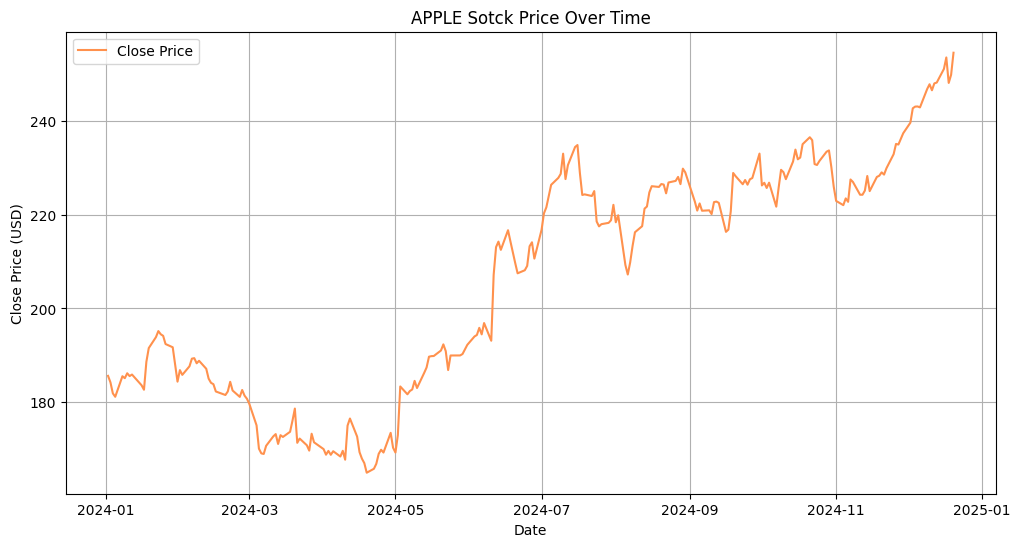

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.index, stock_data['Close'],label = 'Close Price', color = '#FF914D')
plt.title('APPLE Sotck Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

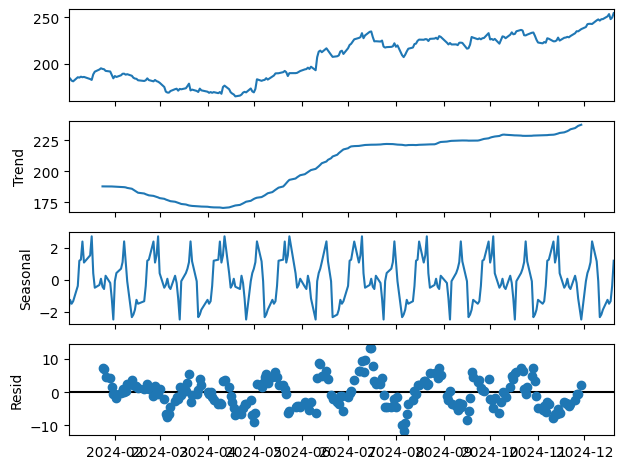

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period = 30)
decomposition_additive.plot()
plt.show()

Classical Decomposition

In [ ]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

# Plotting Individual

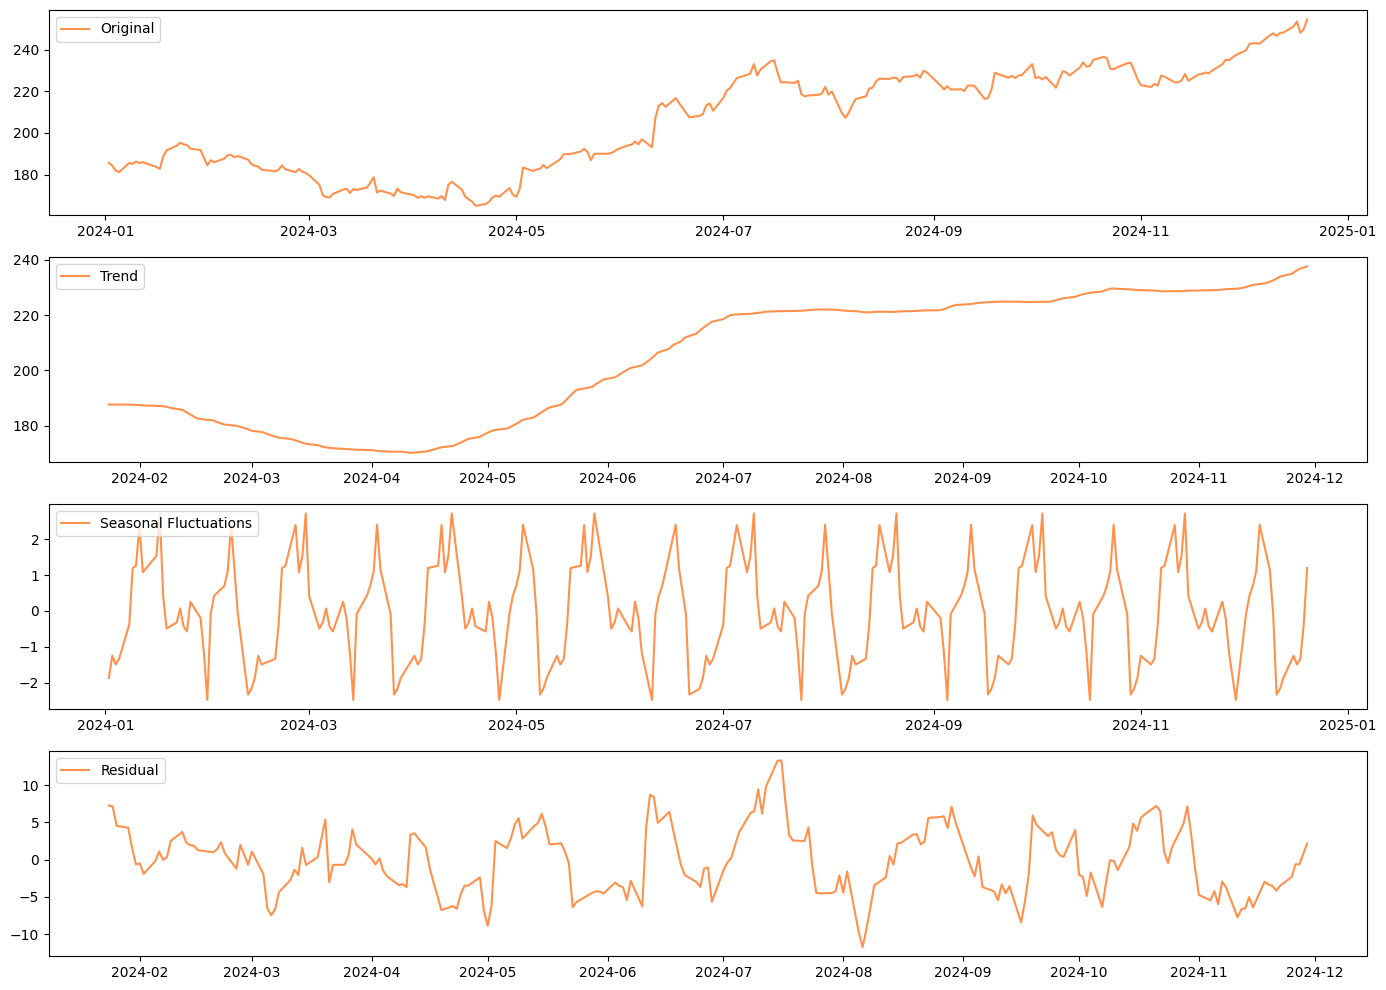

In [ ]:
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend_additive, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label = 'Seasonal Fluctuations', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# STL Decompostion

### STL only supports additive Time Series model

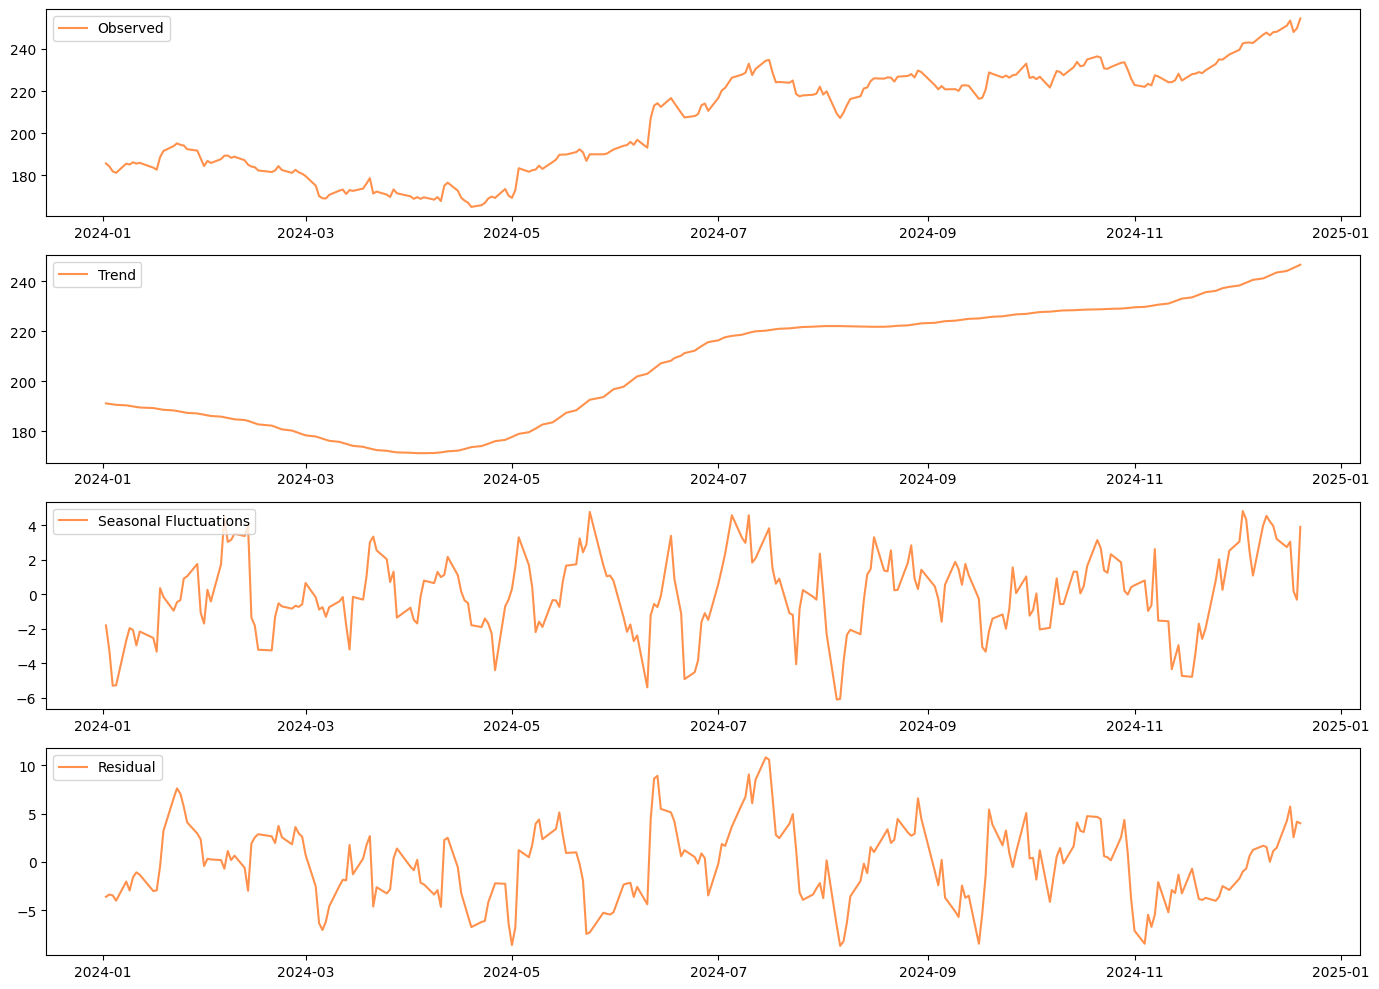

In [ ]:
from statsmodels.tsa.seasonal import STL

# STL Decompostion for the period of 30 days / 1 month
stl = STL(stock_data['Close'], period = 30)
stl_result = stl.fit()

#Plotting the decompostion components
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(stl_result.observed, label = 'Observed', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(stl_result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(stl_result.seasonal, label = 'Seasonal Fluctuations', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(stl_result.resid, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


# Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Performing the augumented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'], autolag = 'AIC')

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print(f'Critical Values:')

for key,value in adf_test[4].items():
  print(f'{key}: round({value},3)')

ADF Test Results:
ADF Statistic: -0.043
p-value: 0.955
Critical Values:
1%: round(-3.4573260719088132,3)
5%: round(-2.873410402808354,3)
10%: round(-2.573095980841316,3)


As p>0.05 this indicates the data is non stationary

## KPSS Test


In [ ]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant level stationarity and 'ct' implies trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],3)}')
print(f'p-value: {round(kpss_test[1],3)}')
print(f'Critical Values:')

for key,value in kpss_test[3].items():
  print(f'{key}: round({value},3)')


KPSS Test Results:
KPSS Statistic: 0.202
p-value: 0.015
Critical Values:
10%: round(0.119,3)
5%: round(0.146,3)
2.5%: round(0.176,3)
1%: round(0.216,3)


## p<0.05 so we can reject the null hypothesis as per KPSS test as H0 is the data is not stationary and accept the alternate hypothesis H1 that says the data is **not stationary**

# check for Strict Stationarity and weak stationarity

just generating ramdom synthetic data for the understanding of check for strict stationarity and weak stationarity

In [ ]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Generating synthetic data for learning
np.random.seed(0)
n = 500

# Strictly stationary series : normally sistributed random noise
strict_stationary_series = np.random.normal(0,1,n)

# Non-strictly stationary series : changing variance for getting weak stationarity
non_strictly_stationary_series = np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
])

# Function to split the series into two halves and perform the K-S test

def ks_test_stationarity(series):
  split = len(series)//2
  # series_first_half = series[: split]
  # series_second_half = series[split:]
  # stat , p_value = ks_2samp(series_first_half, series_second_half)
  # return p_value
  return ks_2samp(series[:split], series[split:])


  # Perform the K-S test on strictly stationary sereies
  ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

  # Performing the K-S test on non-strictly stationary series
  ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strictly_stationary_series)

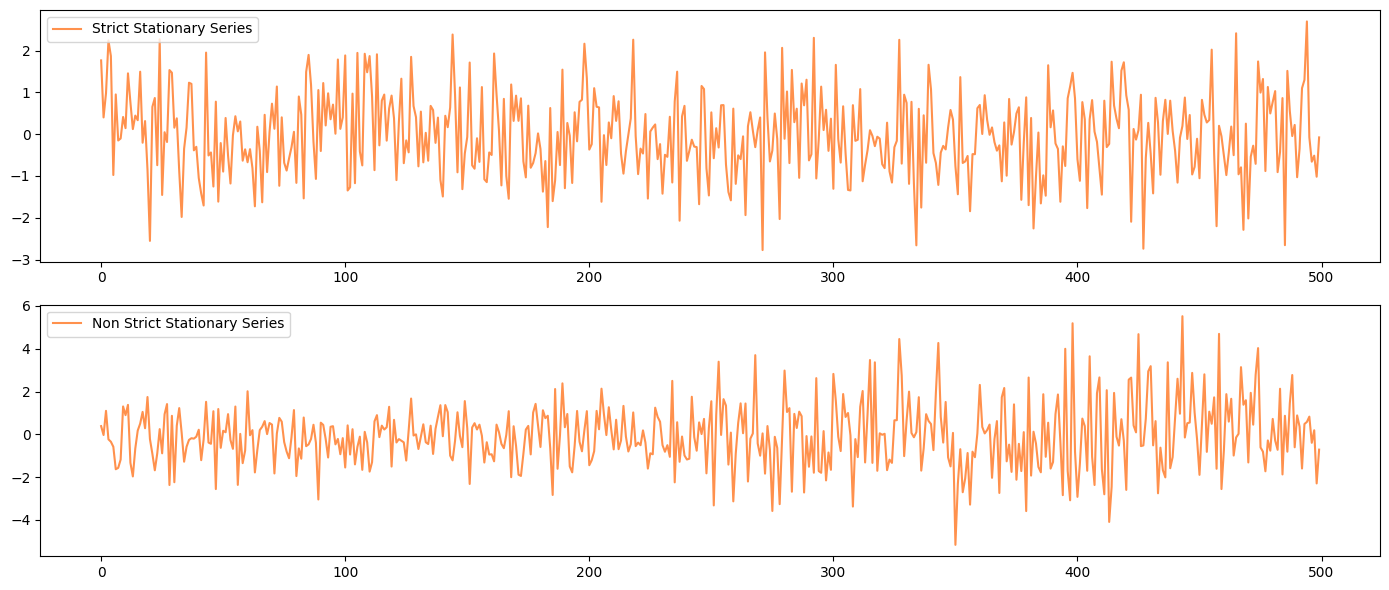

K-S Test Results for Strict Stationary Series:
K-S Statistic: 0.068
p-value: 0.611
K-S Test Results for Non Strict Stationary Series:
K-S Statistic: 0.184
p-value: 0.0


In [ ]:
# prompt: plot the series for strict_stationary_series and non strict_stationary_series

  # Perform the K-S test on strictly stationary sereies
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

  # Performing the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strictly_stationary_series)

  # Plotting for visualiation
plt.figure(figsize= (14,6))
plt.subplot(2,1,1)
plt.plot(strict_stationary_series, label = 'Strict Stationary Series', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(2,1,2)
plt.plot(non_strictly_stationary_series, label = 'Non Strict Stationary Series', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

print(f'K-S Test Results for Strict Stationary Series:')
print(f'K-S Statistic: {round(ks_stat_strict,3)}')
print(f'p-value: {round(ks_pvalue_strict,3)}')
print(f'K-S Test Results for Non Strict Stationary Series:')
print(f'K-S Statistic: {round(ks_stat_non_strict,3)}')
print(f'p-value: {round(ks_pvalue_non_strict,3)}')

## So to analysis / predict a non stationary tine series as our apple stock market data we have to make it stationary series so that we can apply our forcastingg models

#### ther are 4 methods to make a time series data a stationary data

# Making Data Stationary

In [ ]:
def adf_test(series):
  adf_test = adfuller(series, autolag = 'AIC')
  print('ADF Test Results:')
  print(f'ADF Statistic: {round(adf_test[0],3)}')
  print(f'p-value: {round(adf_test[1],3)}')
  for key,value in adf_test[4].items():
    print(f'Critical Value {key}: round({value},3)')

  if adf_test[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is non stationary')


def kpss_test(series):
  kpss_test = kpss(series, regression = 'c')
  print('KPSS Test Results:')
  print(f'KPSS Statistic: {round(kpss_test[0],3)}')
  print(f'p-value: {round(kpss_test[1],3)}')
  for key,value in kpss_test[3].items():
    print(f'Critical Value {key}: round({value},3)')

  if kpss_test[1] <= 0.05:
    print('The series is non stationary')
  else:
    print('The series is stationary')

In [ ]:
prices = stock_data['Close']

In [ ]:
adf_test(prices)

ADF Test Results:
ADF Statistic: -0.043
p-value: 0.955
Critical Value 1%: round(-3.4573260719088132,3)
Critical Value 5%: round(-2.873410402808354,3)
Critical Value 10%: round(-2.573095980841316,3)
The series is non stationary


In [ ]:
prices

Ticker,AAPL
Date,
2024-01-02,185.639999
2024-01-03,184.250000
2024-01-04,181.910004
2024-01-05,181.179993
2024-01-08,185.559998
...,...
2024-12-16,251.039993
2024-12-17,253.479996
2024-12-18,248.050003


## Method 1 Diffrencing

In [ ]:
diff_prices = prices.diff()
adf_test(diff_prices.dropna())

ADF Test Results:
ADF Statistic: -14.748
p-value: 0.0
Critical Value 1%: round(-3.457437824930831,3)
Critical Value 5%: round(-2.873459364726563,3)
Critical Value 10%: round(-2.573122099570008,3)
The series is stationary


So from the first order diffrencing the series became stationary so we do not need to apply second order diffrencing else we would have apllied diff_prices.diff()

## Method 2 Power transformation

In [ ]:
import numpy as np
from scipy import stats

# Log Transformation
prices_log = np.log(prices)

# Power Transformation square root transformation
prices_squrt = np.sqrt(prices)

# Box- Cox transformation
# ** Box-Cox requires all posotive values
#prices_boxcox , lam = stats.boxcox(prices[prices > 0])
print('log data: ')
prices_log



log data: 


Ticker,AAPL
Date,
2024-01-02,5.223809
2024-01-03,5.216294
2024-01-04,5.203512
2024-01-05,5.199491
2024-01-08,5.223378
...,...
2024-12-16,5.525612
2024-12-17,5.535285
2024-12-18,5.513630


In [ ]:
print('sqrt data: ')
prices_squrt

sqrt data: 


Ticker,AAPL
Date,
2024-01-02,13.624977
2024-01-03,13.573872
2024-01-04,13.487402
2024-01-05,13.460312
2024-01-08,13.622041
...,...
2024-12-16,15.844242
2024-12-17,15.921055
2024-12-18,15.749603


In [ ]:
adf_test(prices_log)

ADF Test Results:
ADF Statistic: -0.193
p-value: 0.939
Critical Value 1%: round(-3.4573260719088132,3)
Critical Value 5%: round(-2.873410402808354,3)
Critical Value 10%: round(-2.573095980841316,3)
The series is non stationary


In [ ]:
adf_test(prices_squrt)

ADF Test Results:
ADF Statistic: -0.119
p-value: 0.948
Critical Value 1%: round(-3.4573260719088132,3)
Critical Value 5%: round(-2.873410402808354,3)
Critical Value 10%: round(-2.573095980841316,3)
The series is non stationary


As transformation is not that effective that means the data have a stable variance so the transformation was not abel to stablize the variance more as it was already stablized

# Detrending

In [ ]:
from scipy import signal

trend = np.polyfit(np.arange(len(prices)),prices,1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

ValueError: Unable to coerce to Series, length must be 1: given 246

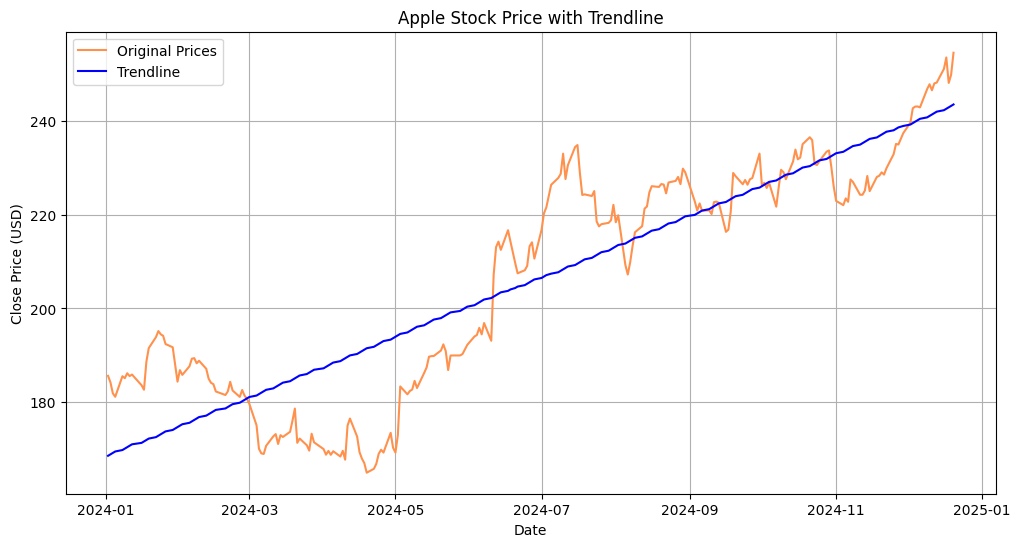

In [ ]:
# prompt: plot the trendline from the prices data

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'prices' is already defined from the previous code
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))

plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='Original Prices', color='#FF914D')
plt.plot(prices.index, trendline, label='Trendline', color='blue')  # Plot the trendline
plt.title('Apple Stock Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Moving Average Method

In [ ]:
# window size = 12
window = 12
prices_ma = prices.rolling(window = window).mean()
# prices_ma.dropna(inplace = True)
prices_detrended = prices - prices_ma
prices_detrended.dropna(inplace = True)


In [ ]:
adf_test(prices_detrended)

ADF Test Results:
ADF Statistic: -4.419
p-value: 0.0
Critical Value 1%: round(-3.458731141928624,3)
Critical Value 5%: round(-2.8740258764297293,3)
Critical Value 10%: round(-2.5734243167124093,3)
The series is stationary


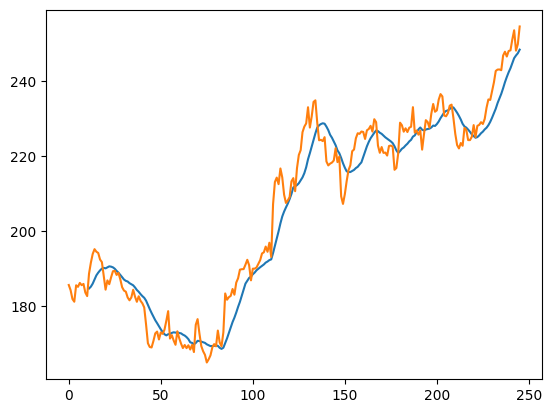

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

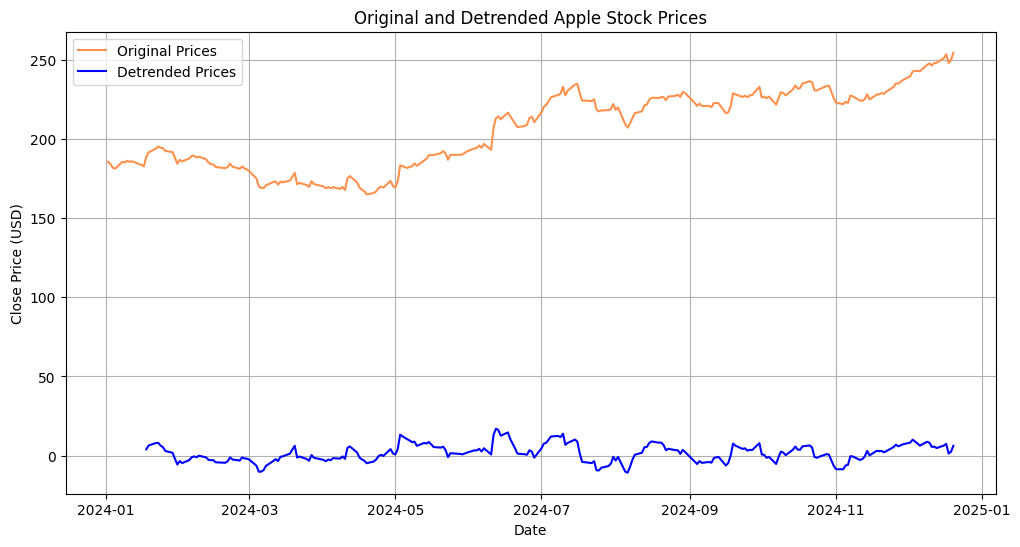

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='Original Prices', color='#FF914D')
plt.plot(prices_detrended.index, prices_detrended, label='Detrended Prices', color='blue')
plt.title('Original and Detrended Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# window size = 5
window = 5
prices_ma = prices.rolling(window = window).mean()
# prices_ma.dropna(inplace = True)
prices_detrended = prices - prices_ma
prices_detrended.dropna(inplace = True)

adf_test(prices_detrended)

ADF Test Results:
ADF Statistic: -7.867
p-value: 0.0
Critical Value 1%: round(-3.4578942529658563,3)
Critical Value 5%: round(-2.8736593200231484,3)
Critical Value 10%: round(-2.573228767361111,3)
The series is stationary


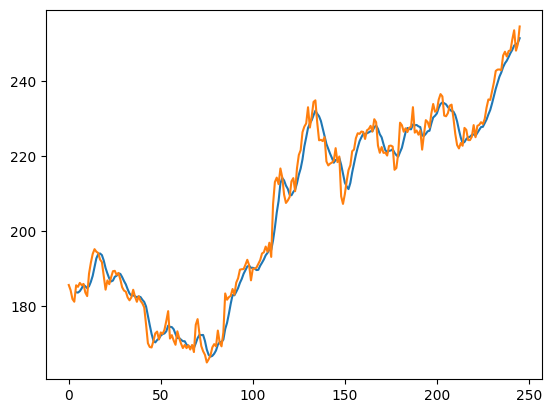

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [ ]:
# window size = 30
window = 30
prices_ma = prices.rolling(window = window).mean()
# prices_ma.dropna(inplace = True)
prices_detrended = prices - prices_ma
prices_detrended.dropna(inplace = True)

adf_test(prices_detrended)

ADF Test Results:
ADF Statistic: -2.261
p-value: 0.185
Critical Value 1%: round(-3.4609922013325267,3)
Critical Value 5%: round(-2.875015740963014,3)
Critical Value 10%: round(-2.5739524288408777,3)
The series is non stationary


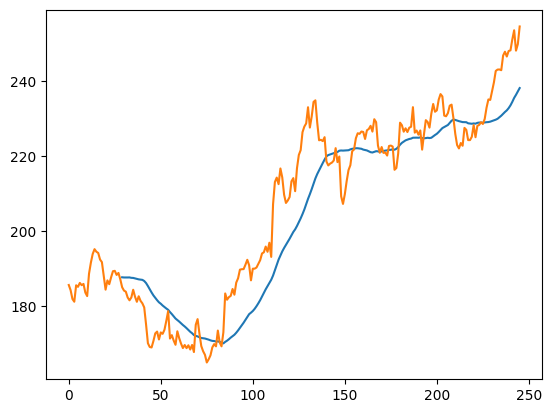

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [ ]:
# window size = 25
window = 25
prices_ma = prices.rolling(window = window).mean()
# prices_ma.dropna(inplace = True)
prices_detrended = prices - prices_ma
prices_detrended.dropna(inplace = True)

adf_test(prices_detrended)

ADF Test Results:
ADF Statistic: -2.52
p-value: 0.111
Critical Value 1%: round(-3.4602906385073884,3)
Critical Value 5%: round(-2.874708679520702,3)
Critical Value 10%: round(-2.573788599127782,3)
The series is non stationary


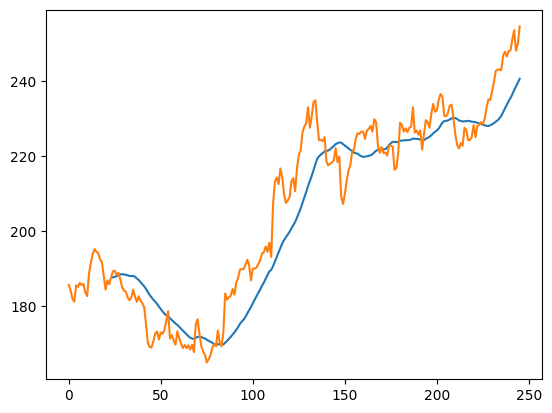

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [ ]:
# window size = 20
window = 20
prices_ma = prices.rolling(window = window).mean()
# prices_ma.dropna(inplace = True)
prices_detrended = prices - prices_ma
prices_detrended.dropna(inplace = True)

adf_test(prices_detrended)

ADF Test Results:
ADF Statistic: -2.951
p-value: 0.04
Critical Value 1%: round(-3.4596204846395824,3)
Critical Value 5%: round(-2.8744153028455948,3)
Critical Value 10%: round(-2.5736320761218576,3)
The series is stationary


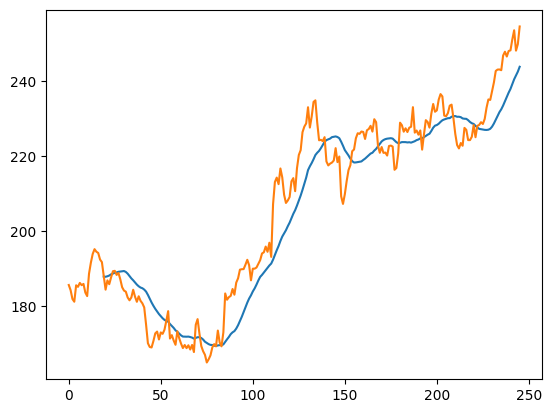

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

## Smaller window size will give better results

# Seasonal Adjustment

## Removing seasonal component

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(prices, model = 'additive', period = 30)
seasonal = decompostion.seasonal
prices_detrended = prices - seasonal
prices_detrended.dropna(inplace = True)

adf_test(prices_detrended['Close'])


KeyError: 'Close'

# Time Series Forecasting Models

# AR Model

In [ ]:
stock_data = yf.download('AAPL', start = '2023-01-01') # Analysing for 2 years now

apple_price_stationary = stock_data['Close'].diff().dropna()

# slpit the data into training and testing datasets
train_data , test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 2.4400322839936766


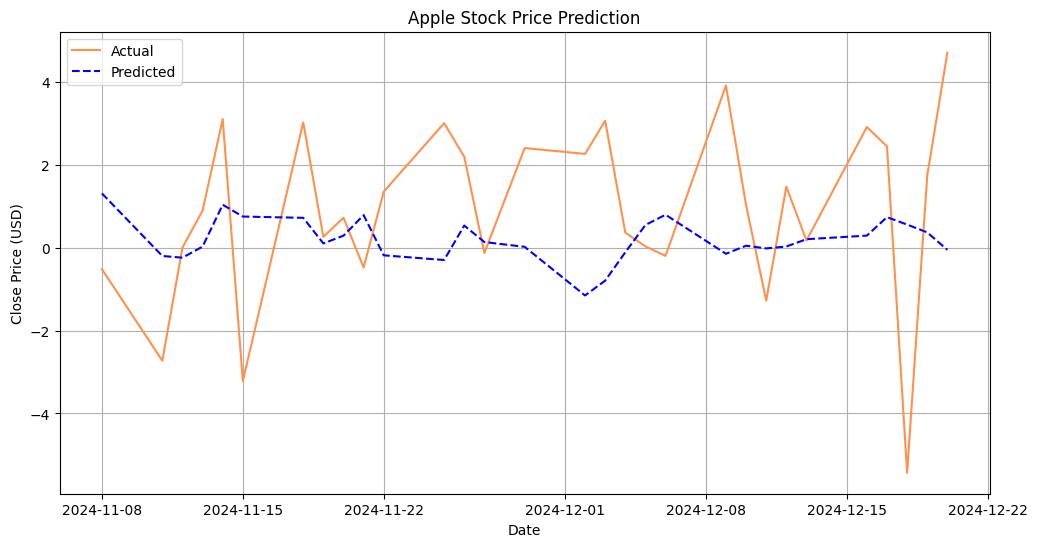

In [ ]:
from logging import warning
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# fitting the AR model to trianing data
model = AutoReg(train_data, lags = 30, old_names = False)
model_fit = model.fit()

# make predictions on the test data
predictions_ar = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

# plot the actual vs predicted values
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions_ar, label = 'Predicted', color = 'blue', linestyle = '--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Evaluation metric of rmse
rmse_ar = np.sqrt(mean_squared_error(test_data, predictions_ar))
print(f'Root Mean Squared Error (RMSE): {rmse_ar}')


##MA Model

Root Mean Squared Error (RMSE): 2.416626626552181


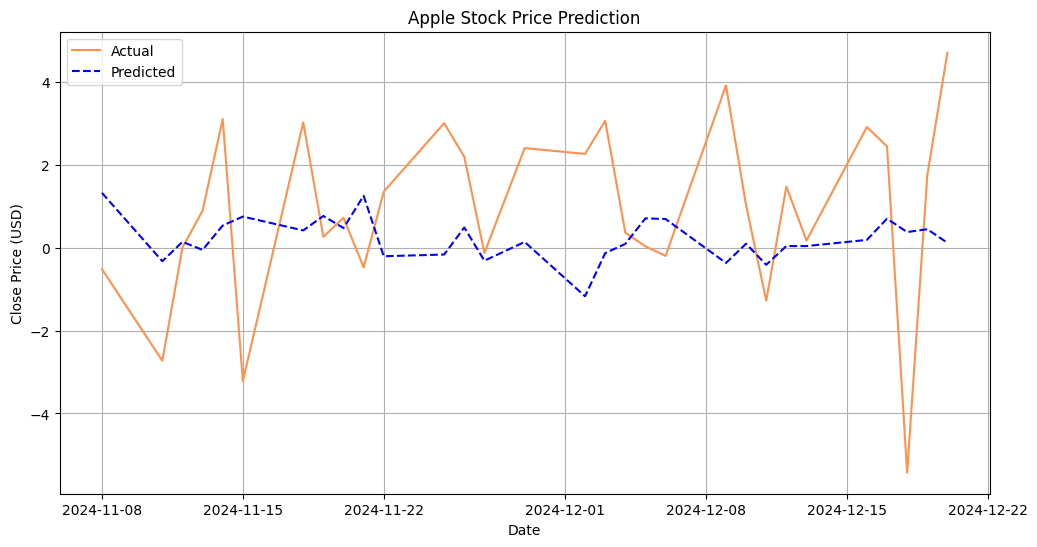

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fir moving average in arima as differnce as 0
model = ARIMA(train_data, order = (0,0,30))
model_fit = model.fit()

# make predictions on the test data
predictions_ma = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

#plot the actual vs predicted
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions_ma, label = 'Predicted', color = 'blue', linestyle = '--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Evaluation metric of rmse
rmse_ma = np.sqrt(mean_squared_error(test_data, predictions_ma))
print(f'Root Mean Squared Error (RMSE): {rmse_ma}')


# ARMA Model

Root Mean Squared Error (RMSE): 2.270766349918448


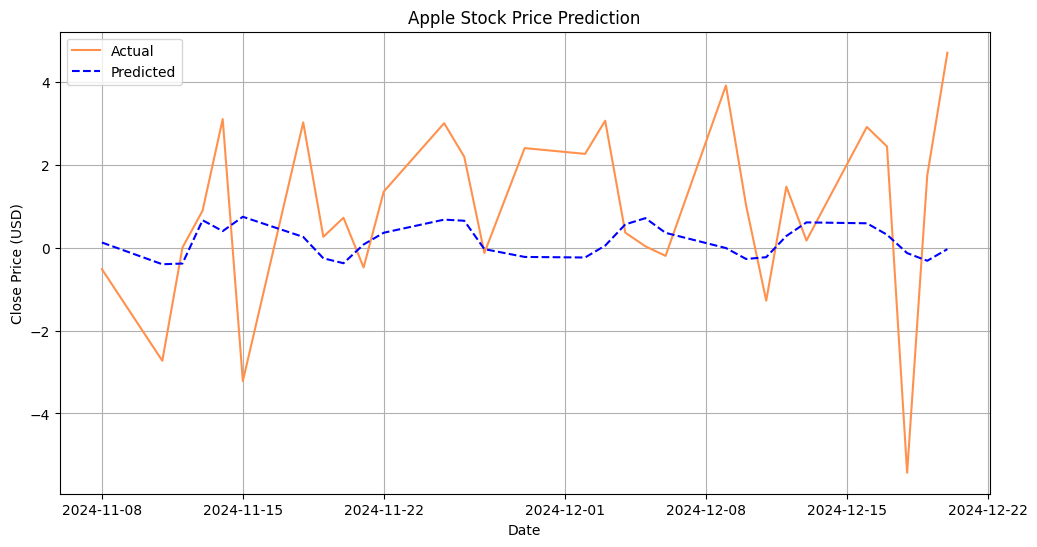

In [ ]:
model = ARIMA(train_data, order = (7,0,7)) # taking 7 days previous values or lag
model_fit = model.fit()

# make predictions on the test data
predictions_arma = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

#plot the actual vs predicted
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions_arma, label = 'Predicted', color = 'blue', linestyle = '--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Evaluation metric of rmse
rmse_arma = np.sqrt(mean_squared_error(test_data, predictions_arma))
print(f'Root Mean Squared Error (RMSE): {rmse_arma}')



# ARIMA model

Root Mean Squared Error (RMSE): 2.3039822347629624


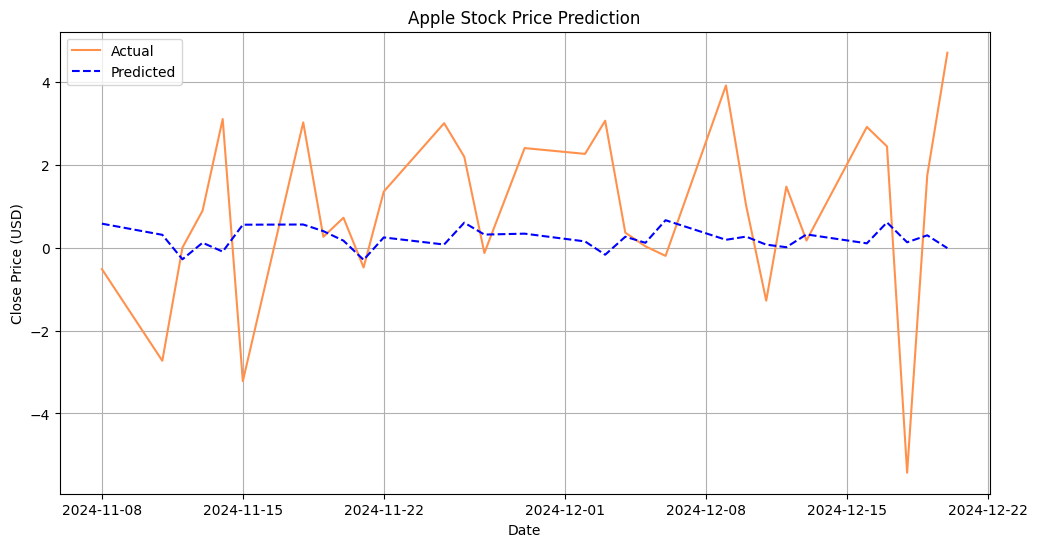

In [ ]:
model = ARIMA(train_data, order = (7,1,7)) # taking 30 days previous values or lag
model_fit = model.fit()

# make predictions on the test data
predictions_arima = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

#plot the actual vs predicted
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions_arima, label = 'Predicted', color = 'blue', linestyle = '--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Evaluation metric of rmse
rmse_arima = np.sqrt(mean_squared_error(test_data, predictions_arima))
print(f'Root Mean Squared Error (RMSE): {rmse_arima}')

#SARIMA Model

Root Mean Squared Error (RMSE): 2.429140410644905


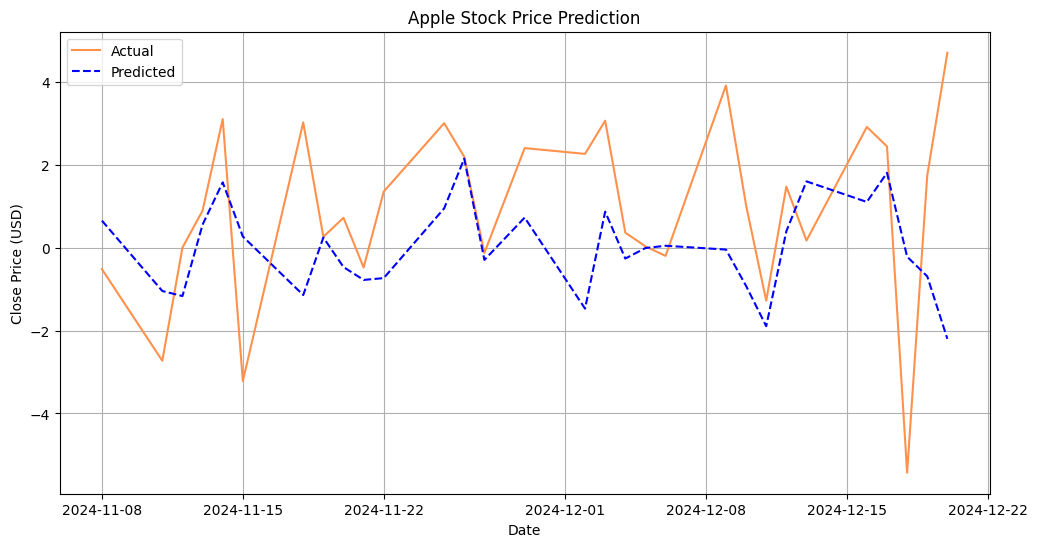

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 7,1,7
P,D,Q,s = 1,1,1,45
model = SARIMAX(train_data, order = (p,d,q), seasonal_order = (P,D,Q,s))
model_fit = model.fit()

# predictions on the test data
predictions_sarima = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) -1 , dynamic = False)

# plot the actual vs predicted
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data, label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions_sarima, label = 'Predicted', color = 'blue', linestyle = '--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# Evaluation metric of rmse
rmse_sarima = np.sqrt(mean_squared_error(test_data, predictions_sarima))
print(f'Root Mean Squared Error (RMSE): {rmse_sarima}')

# Vector model for MultiVariate Analysis

In [ ]:
# Using Tesla stock price data for the hypothesis

tesla_data = yf.download('TSLA', start = '2023-01-01')
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-01-03,108.099998,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,119.769997,123.519997,117.110001,118.959999,190284000


In [ ]:
tesla_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,TSLA,0
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [ ]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351761,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023178,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [ ]:
stock_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [ ]:
tesla_data['Close'].isnull().sum()

,0
Ticker,
TSLA,0


In [ ]:
stock_data['Close'].head()

Ticker,AAPL
Date,
2024-01-02,185.639999
2024-01-03,184.250000
2024-01-04,181.910004
2024-01-05,181.179993
2024-01-08,185.559998


In [ ]:
stock_copy = stock_data.copy()
stock_copy['TSLA_Close'] = tesla_data['Close']
stock_copy['AAPL_Close'] = stock_copy['Close'].shift()
# stock_copy.dropna(inplace = True)


stock_copy.isnull().sum()

# from statsmodels.tsa.stattools import grangercausalitytests

# grangercausalitytests(stock_data[['TSLA_Close','APPL_Close']], maxlag = 10, verbose = True)
# print()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
TSLA_Close,,246
APPL_Close,,246
AAPL_Close,,1


In [ ]:
stock_copy.shape

(246, 8)

In [ ]:
stock_copy

Price,Adj Close,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close,AAPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,


In [ ]:
tesla_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-01-03,108.099998,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,119.769997,123.519997,117.110001,118.959999,190284000
...,...,...,...,...,...,...
2024-12-16,463.019989,463.019989,463.190002,436.149994,441.089996,114083800
2024-12-17,479.859985,479.859985,483.989990,457.510010,475.899994,131223000


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Download data
stock_data_AAPL = yf.download('AAPL', start='2023-01-01')
tesla_data = yf.download('TSLA', start='2023-01-01')

# Ensure indexes are aligned and add Tesla close price
stock_data_AAPL['TSLA_Close'] = tesla_data['Close']
stock_data_AAPL['AAPL_Close'] = stock_data_AAPL['Close'].shift()

# Drop missing values
stock_data_AAPL.dropna(inplace=True)

# Verify if there are still missing values
print(stock_data_AAPL.isnull().sum())

# Perform Granger causality test
grangercausalitytests(stock_data_AAPL[['AAPL_Close', 'TSLA_Close']], maxlag=10, verbose=True)
print()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price       Ticker
Adj Close   AAPL      0
Close       AAPL      0
High        AAPL      0
Low         AAPL      0
Open        AAPL      0
Volume      AAPL      0
TSLA_Close            0
AAPL_Close            0
dtype: int64

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3093  , p=0.2531  , df_denom=491, df_num=1
ssr based chi2 test:   chi2=1.3173  , p=0.2511  , df=1
likelihood ratio test: chi2=1.3156  , p=0.2514  , df=1
parameter F test:         F=1.3093  , p=0.2531  , df_denom=491, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=32.9156 , p=0.0000  , df_denom=488, df_num=2
ssr based chi2 test:   chi2=66.5058 , p=0.0000  , df=2
likelihood ratio test: chi2=62.3865 , p=0.0000  , df=2
parameter F test:         F=32.9156 , p=0.0000  , df_denom=488, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.8306 , p=0.0000  , df_denom=485, df_num=3
ssr based chi2 test:   chi2=66.4370 , p=0.0000  , df=

As p is almost 0 implies apple stock prices completely affects the stock price of Tesla (Close Price)

In [ ]:
data = stock_data_AAPL[['AAPL_Close','TSLA_Close']].diff().dropna() # 1st order diffrencing for deTrending
train_data, test_data = data[:-14], data[-14:]

Root Mean Squared Error (RMSE): 17.60492981025279


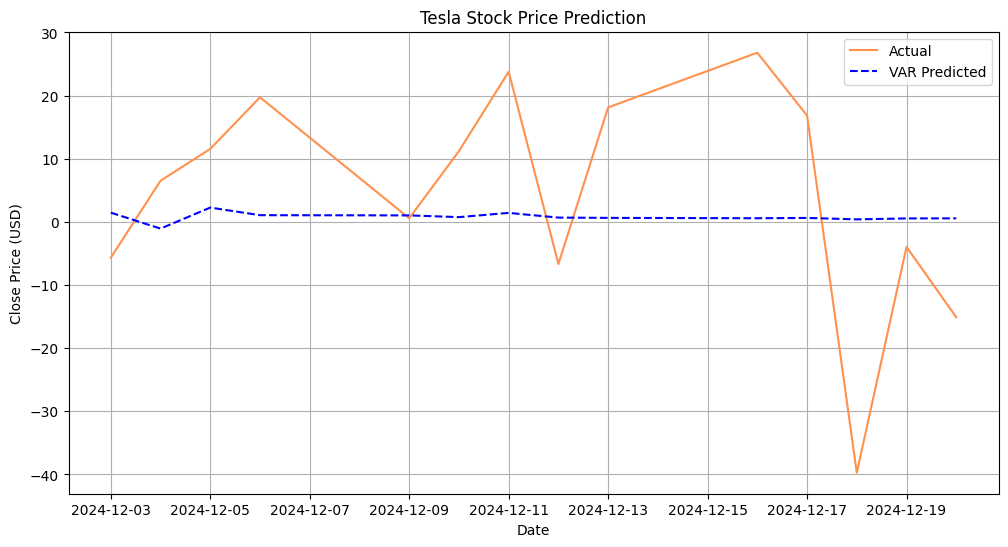

In [ ]:
from statsmodels.tsa.api import VAR, VARMAX

# VAR
model = VAR(train_data)
result = model.fit(maxlags = 7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps = len(test_data))

predictions = pd.DataFrame(predictions, columns = ['AAPL_Close','TSLA_Close'], index = test_data.index)
plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VAR Predicted', color = 'blue', linestyle = '--')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)

# evaluating RMSE
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 17.59774529492626


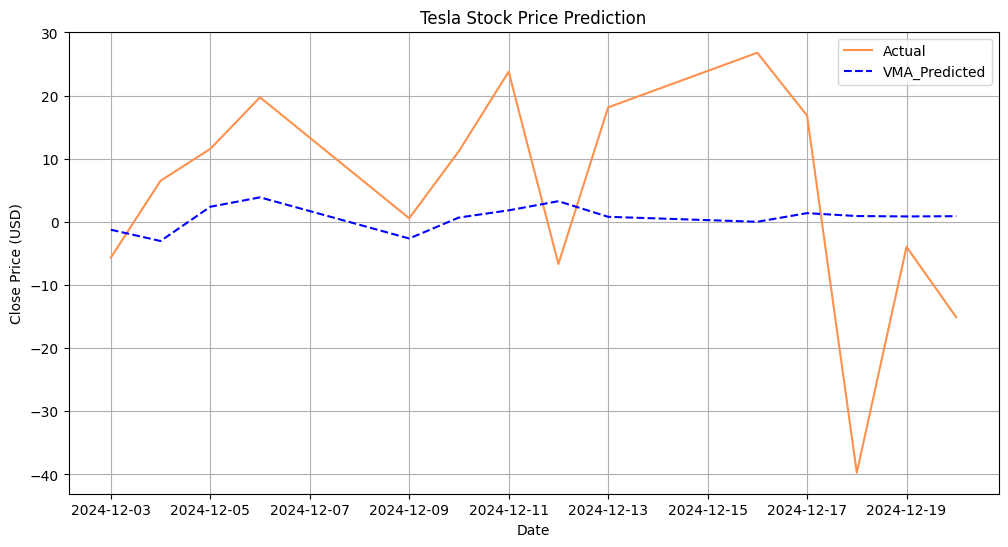

In [ ]:
#VMA
model = VARMAX(train_data, order = (0,14))
result = model.fit()
predictions = result.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VMA_Predicted', color = 'blue', linestyle = '--')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)

# evaluating RMSE
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 18.333009075031786


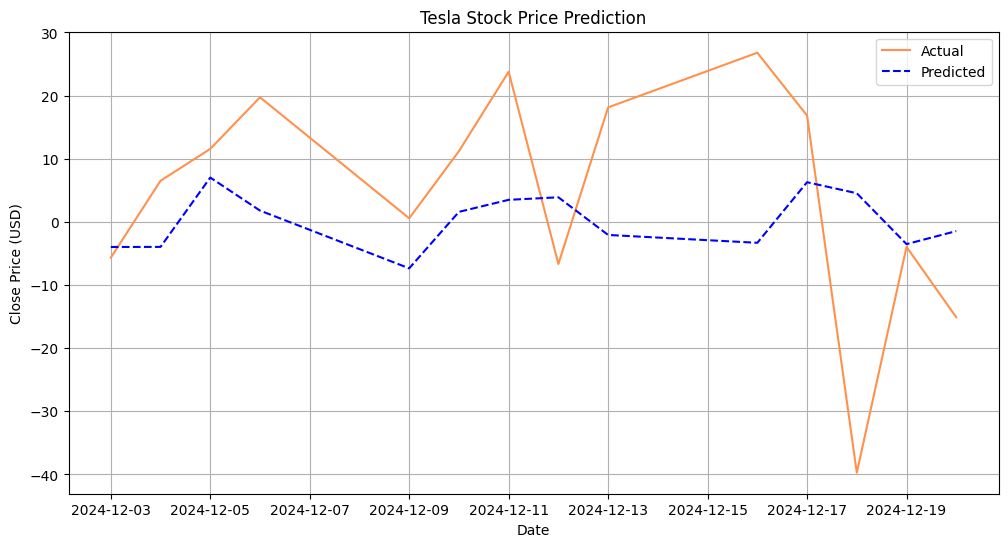

In [ ]:
# VARIMA
model = VARMAX(train_data, order = (14,14))
result = model.fit()
predictions = result.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize = (12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual', color = '#FF914D')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'Predicted', color = 'blue', linestyle = '--')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)

# evaluating RMSE
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))
print(f'Root Mean Squared Error (RMSE): {rmse}')